# What Exactly is DBSCAN Clustering?

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.

It groups **densely grouped** data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. The most exciting feature of **DBSCAN clustering** is that it is **robust to outliers.** It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

# Parameters Required For DBSCAN Algorithm

1. **Epsilon** is the radius of the circle to be created around each data point to check the density.
2. **minPoints** is the minimum number of data points required inside that circle for that data point to be classified as a **Core point.**

We have some data points represented by grey color. Let’s see how DBSCAN clusters these data points.

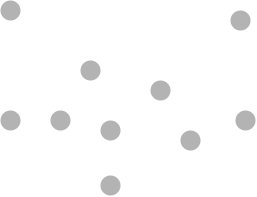

**DBSCAN** creates a circle of **epsilon radius** around every data point and classifies them into **Core point, Border point, and Noise.** A data point is a Core point if the circle around it contains at least **‘minPoints’ number of points.** If the number of points is less than minPoints, then it is classified as Border Point, and if there are no other data points around any data point within epsilon radius, then it treated as Noise.

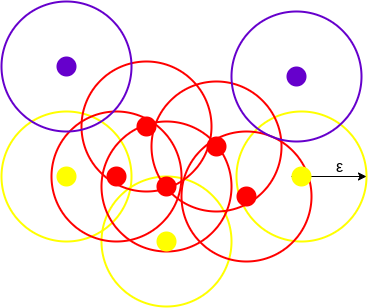

The above figure shows us a cluster created by DBCAN with minPoints = 3. Here, we draw a circle of equal radius epsilon around every data point. These two parameters help in creating spatial clusters.

All the data points with at least 3 points in the circle including itself are considered as Core points represented by red color.

All the data points with less than 3 but greater than 1 point in the circle including itself are considered as Border points. They are represented by yellow color.

 Finally, data points with no point other than itself present inside the circle are considered as Noise represented by the purple color.

For locating data points in space, DBSCAN uses Euclidean distance

# Steps Used In DBSCAN Algorithm

1. Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.
2. For each core point if it is not already assigned to a cluster, create a new cluster.
3. Find recursively all its density-connected points and assign them to the same cluster as the core point. A point a and b are said to be density connected if there exists a point c which has a sufficient number of points in its neighbors and both points a and b are within the eps distance. This is a chaining process. So, if b is a neighbor of c, c is a neighbor of d, and d is a neighbor of e, which in turn is  neighbor of a implying that b is a neighbor of a.
4. Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs( n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

X = StandardScaler().fit_transform(X)

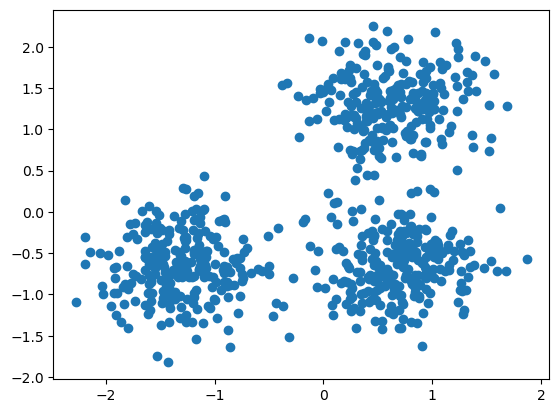

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


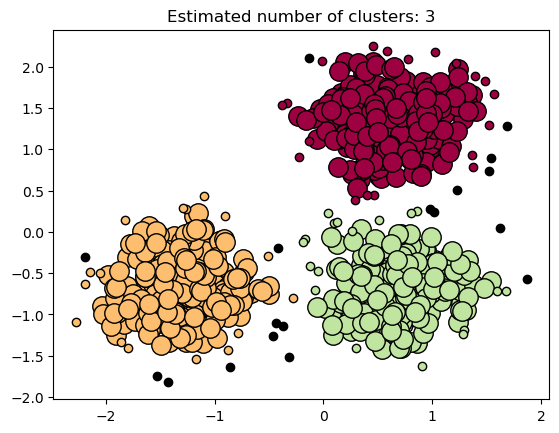

In [5]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()